# AARRR 지표 중 Acquisition 확인
---


In [1]:
## 1.필요 라이브러리 정리 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object 형식으로 저장된 변수를 list 형식으로 바꾸기 위해서
import ast

# GCS 파일 경로에서 데이터 불러오기 위한 라이브러리
from google.cloud import storage
from google.oauth2 import service_account

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter



In [2]:
# 인증
key_path = "/home/user/codeit_project/codeit-project-docker/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS 클라이언트 생성
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced_data-bucket")

# 'votes/' 경로에 있는 .parquet 파일 리스트 가져오기
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# 결과 확인
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' 경로에 있는 .parquet 파일 리스트 가져오기
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced_data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # 결과 확인
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced_data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced_data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced_data-bucket/votes/accounts_group.parquet', 'gs://my-advanced_data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced_data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced_data-bucket/votes/accounts_school.parquet', 'gs://my-advanced_data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user.parquet', 'gs://my-advanced_data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced_data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced_data-bucket/vot

In [3]:
# 결과 저장용 딕셔너리
df_dict = {}

# vote 내 각 파일을 불러와서 딕셔너리에 저장
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # 데이터 불러오기
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # 딕셔너리에 저장
    df_dict[df_file_name] = df

    # 출력
    print(f"{df_file_name} 데이터 프레임 확인")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} 데이터 프레임 크기 : {df.shape}")
    print()
    print(f"{df_file_name} 기본 정보 확인")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance 데이터 프레임 확인
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance 데이터 프레임 크기 : (349637, 3)

accounts_attendance 기본 정보 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

----------------------------------------------------------------------

accounts_b

## Vote 데이터로 확인
---
- created_at이 회원가입 완료한 시점에 대한 데이터임을 확인
    - 해당 데이터는 hackle_properties와 hackle_events 병합 데이터와 accounts_user 통해서 확인(looking_for_AARRR 파일에 존재)
- 그렇기 때문에 accounts_user의 created_at의 값은 회원가입이 완료된 시점으로 판단할 수 잇음


,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0


accounts_user 데이터 타입 확인
id                             int64
is_superuser                   int64
is_staff                       int64
gender                        object
point                          int64
friend_id_list                object
is_push_on                     int64
created_at            datetime64[ns]
block_user_id_list            object
hide_user_id_list             object
ban_status                    object
report_count                   int64
alarm_count                    int64
pending_chat                   int64
pending_votes                  int64
group_id                     float64
dtype: object


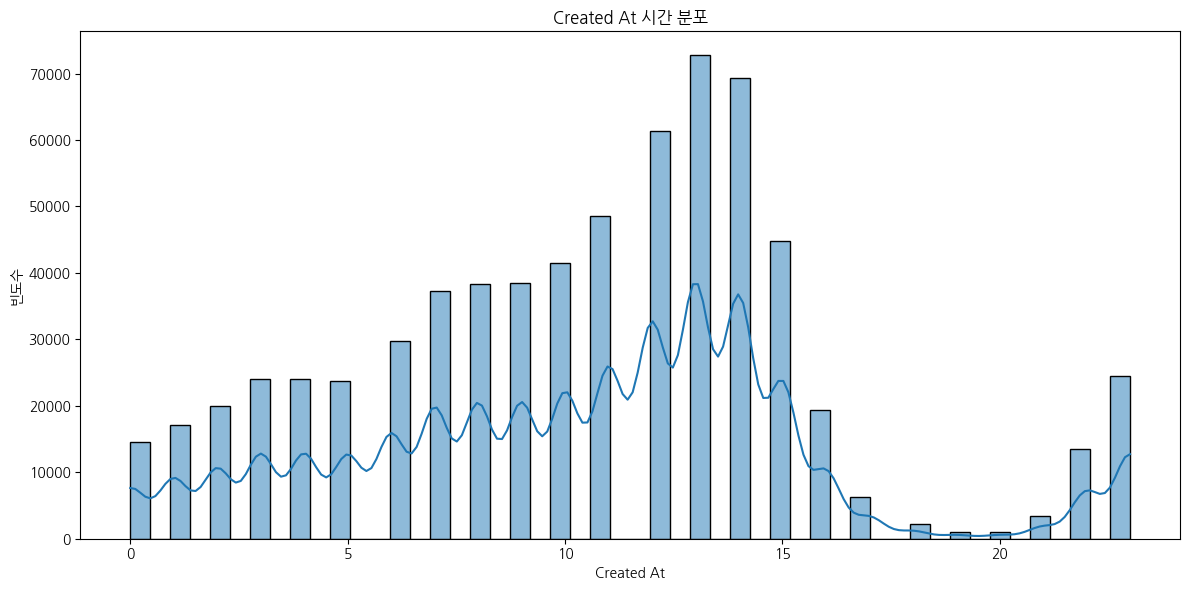

In [4]:
# 복사본 제작을 위해서
accounts_user = df_dict["accounts_user"].copy()
display(accounts_user.head())

# 우선 데이터 타입 확인
print("accounts_user 데이터 타입 확인")
print(accounts_user.dtypes)

# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

In [5]:
# 그렇다면 hackle 데이터에서 event_key가 "complete_signup"인 데이터 추출해서 시간대 분포 확인
# hackle 데이터 불러오기

## GCS에서 데이터 불러오기
final_hackle_df = pd.read_parquet(
    "gs://my-advanced_data-bucket/hackle_final/final.parquet",
    storage_options={"token": "/home/user/codeit_project/codeit-project-docker/config/key.json"}
)

display(final_hackle_df.head())

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
0,00000533-3f1c-4b3b-81f1-0c8f35754b4e,2023-07-18 19:40:17,$session_start,4OzYh3seq3VKytpSn5pvQkZNQii1,NaN,NaN,NaN,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
1,00114c10-8321-4978-a73f-fd452162b9f2,2023-07-31 19:11:51,click_notice_detail,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
2,01f136ac-3257-4cf9-b0a9-c0c37fe7e572,2023-07-31 19:14:34,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
3,02cc364e-23ec-46cf-a02f-14cf60f97ec1,2023-07-31 19:13:18,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0
4,05d05a79-cdb3-43fe-b931-5cb0992a36a1,2023-07-31 19:12:50,click_question_open,4OzYh3seq3VKytpSn5pvQkZNQii1,51.0,NaN,1719.0,367093,1041414,590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74,iOS,16.0


In [6]:
# 데이터 타입 확인
print("final_hackle_df 데이터 타입 확인")
print(final_hackle_df.dtypes)

# 데이터 크기 확인
print("final_hackle_df 데이터 크기 확인")
print(final_hackle_df.shape)

# event_key가 "complete_signup"인 데이터 추출
complete_signup_df = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].copy()

# 데이터 크기 확인
print("complete_signup_df 데이터 크기 확인")
print(complete_signup_df.shape)

final_hackle_df 데이터 타입 확인
event_id                  object
event_datetime    datetime64[ms]
event_key                 object
session_id                object
friend_count             float64
question_id              float64
heart_balance            float64
id                         int64
user_id                   object
device_id                 object
osname                    object
osversion                 object
dtype: object
final_hackle_df 데이터 크기 확인
(11406944, 12)
complete_signup_df 데이터 크기 확인
(974, 12)


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
13637,aef1aa85-4b53-4576-8a59-898c621bd8ea,2023-07-21 14:47:08,complete_signup,e118e264-5b37-4b29-9f65-737e614e6614,0.0,NaN,300.0,32,1579202,e118e264-5b37-4b29-9f65-737e614e6614,Android,13
31989,ddf14897-2a99-433d-bbe5-a5e32c83aefd,2023-07-18 11:26:59,complete_signup,83147b91-46d9-4060-b803-d0acfc8750b7,0.0,NaN,300.0,78,1578984,83147b91-46d9-4060-b803-d0acfc8750b7,Android,13
41705,9f57eccd-0be3-4256-bbd7-0aa5ea2f31cc,2023-07-18 15:54:53,complete_signup,CE0BB810-BE00-4C39-97AB-78F4E5D83285,0.0,NaN,300.0,103,1579005,CE0BB810-BE00-4C39-97AB-78F4E5D83285,iOS,16.5.1
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


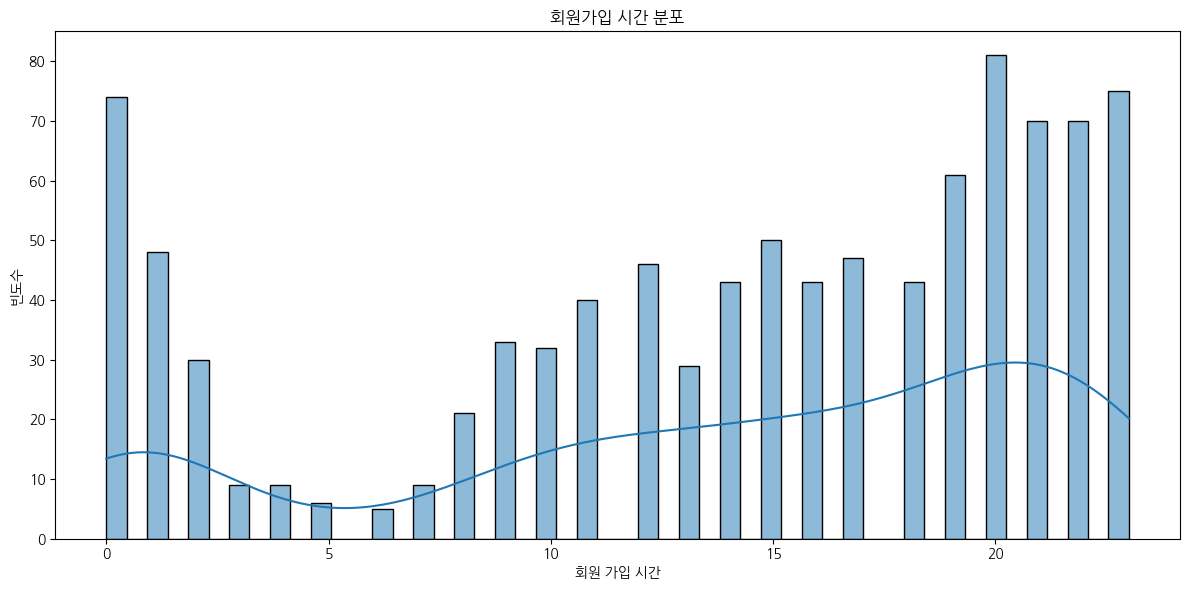

In [7]:
# 필터링한 데이터 확인
display(complete_signup_df.head())

# 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(complete_signup_df['event_datetime'].dt.hour, bins=50, kde=True)
plt.title('회원가입 시간 분포')
plt.xlabel('회원 가입 시간')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- created_at에 9시간을 더해야한다는 이유
    - hackle 데이터와 accounts_user 데이터 살펴보면 9시간 차이가 남
    - 그리고 물론 점심 시간에 회원가입? 가능하다고 생각됨 하지만 새벽 시간대에 이용하는 유저가 지나치게 많아짐

In [8]:
# 만약 account_user 데이터에 created_at에 9시간을 더하게 되면? 시간대 분포는?
accounts_user["created_at_plus_9"] = accounts_user["created_at"] + pd.Timedelta(hours=9)

# 데이터 확인
display(accounts_user.head())

,id,is_superuser,is_staff,gender,point,friend_id_list,is_push_on,created_at,block_user_id_list,hide_user_id_list,ban_status,report_count,alarm_count,pending_chat,pending_votes,group_id,created_at_plus_9
0,831956,1,1,None,600,"[1292473, 913158, 1488461, 1064695, 1043565, 1...",0,2023-03-29 03:44:14.047130,[],[],N,0,0,0,0,NaN,2023-03-29 12:44:14.047130
1,831962,0,0,F,2248,"[833025, 832642, 982531, 879496, 838541, 83752...",1,2023-03-29 05:18:56.162368,[],[],N,253,40878,5499,110,12.0,2023-03-29 14:18:56.162368
2,832151,0,0,M,1519,"[838785, 982531, 882567, 879496, 838541, 83649...",0,2023-03-29 12:56:34.989468,[],[],N,0,37,0,47,1.0,2023-03-29 21:56:34.989468
3,832340,0,0,F,57,"[841345, 982531, 838785, 963714, 882567, 83252...",1,2023-03-29 12:56:35.020790,[],[],N,0,19,0,21,1.0,2023-03-29 21:56:35.020790
4,832520,0,0,M,1039,"[874050, 849763, 874212, 844297, 838541, 84004...",0,2023-03-29 12:56:35.049311,[],[],N,0,29,0,15,12.0,2023-03-29 21:56:35.049311


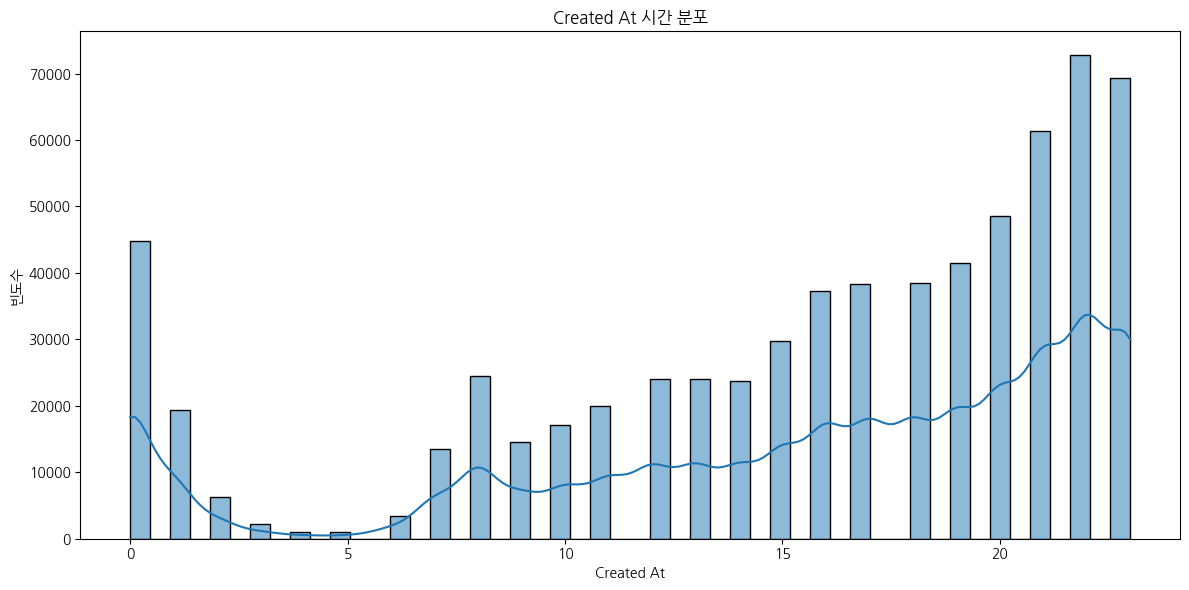

In [9]:
# 9시간을 더한 결과에 대해서 시각화 진행
# created_at 시간대 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(accounts_user['created_at_plus_9'].dt.hour, bins=50, kde=True)
plt.title('Created At 시간 분포')
plt.xlabel('Created At')
plt.ylabel('빈도수')
plt.tight_layout()
plt.show()

- 위 내용을 통해서는 유저 획득이 오히려 밤에 이루어지는 경우가 존재함
- 저녁이나 밤에 활동이 많은 것은 확인함 그렇다면 점심이나 이른 시간대에는?
    - 방학이나 주말인 경우에 다를까?

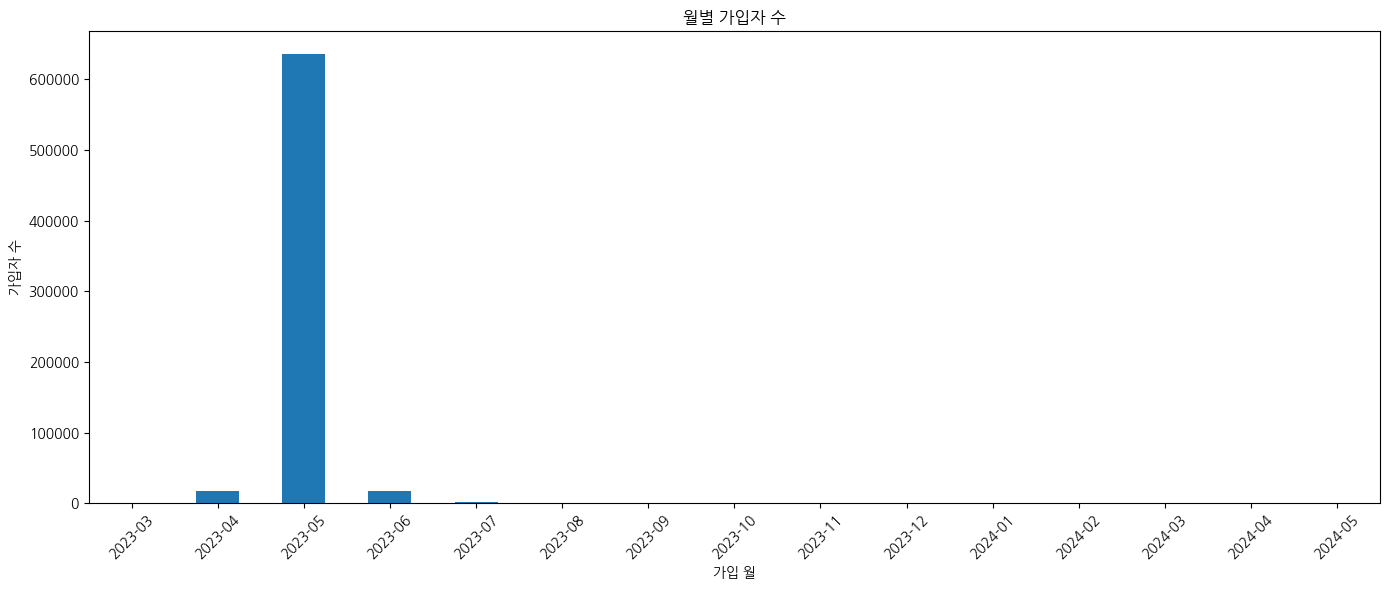

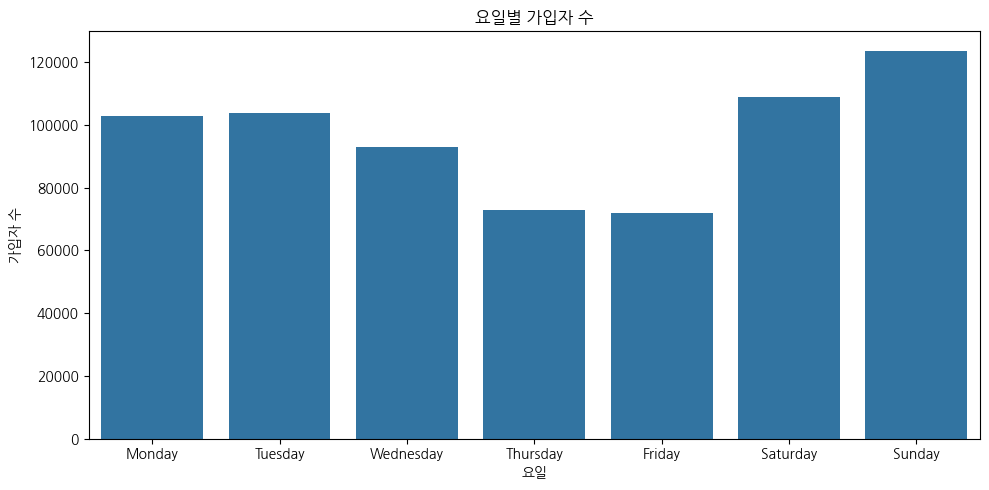

In [10]:
# 월별 가입자 수 집계 및 시각화
accounts_user['month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_counts = accounts_user.groupby('month').size()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='bar')
plt.title('월별 가입자 수')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 요일별 가입자 수 집계 및 시각화
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = accounts_user['weekday'].value_counts().reindex(weekday_order)

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title('요일별 가입자 수')
plt.xlabel('요일')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

- 주말에 좀 더 많은 회원가입이 있었음
- 평일 중 화요일~금요일까지는 감소하는 형태가 보임
    - 때문에 목요일, 금요일에 확실히 큰 감소가 보임
- 데이터가 6월에 초점이 되는 단기성 어플이기 때문에 계절에 따른 영향을 확인할 수 없음

추가로 볼 내용들

- 페이지 흐름 분석 (Signup Funnel)      
회원가입 전 어떤 페이지(또는 행동)들을 거치는가?        
목적 : 이탈률이 높은 지점은 어디인가?       

- 가입 소요 시간 분석       
방문해서 가입하기까지 걸린 시간 분포        
목적 : 바로 가입 vs 여러 번 방문 후 가입 구분       

- 신규 가입자의 초기 행동       
가입 직후 유저가 어떤 행동을 했는가?        
"활성화(Activation)"로 넘어가는 힌트를 여기서 얻음      

- 지역/시간대 기반 분석 (Geo-Temporal)      
지역별 가입자 수 (시/도, 나라, 도시 등)     
지역별 시간대 패턴 차이     



## 앱을 시작하고 회원가입 시작하는데 걸리는 시간 구하기
---
- complete_signup을 가진 session_id 탐색하여 그 session_id 중 launch_app을 가진 session_id가 존재하는지 확인
- complete_signup이 launch_app 보다 앞에 있는 경우가 존재하는지 확인
- 두 event 사이 시간 구하기

In [11]:
# 회원가입 전 event_key의 흐름을 파악하기 위해, 회원가입 완료 이벤트("complete_signup")가 발생한 session_id를 추출
signup_sessions = complete_signup_df['session_id'].unique()

# 해당 session_id에 속한 모든 이벤트를 추출
signup_sessions_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_sessions)].copy()

# 각 session별로 event_key의 순서를 확인
signup_sessions_events_sorted = signup_sessions_events.sort_values(['session_id', 'event_datetime'])

# 예시: 한 session의 event_key 시퀀스 확인
example_session_id = signup_sessions_events_sorted['session_id'].iloc[0]
example_session_events = signup_sessions_events_sorted[signup_sessions_events_sorted['session_id'] == example_session_id]['event_key'].tolist()
print(f"Example session ({example_session_id}) event sequence:")
print(example_session_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)

# session별 event_key 시퀀스 추출
session_event_sequences = (
    signup_sessions_events_sorted.groupby('session_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = session_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences:")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example session (00181B41-078B-4CA0-815F-72D24E5DDF9A) event sequence:
['launch_app', '$session_end', 'launch_app', '$session_start', '$session_end', 'launch_app', 'launch_app', '$session_start', '$session_start', 'launch_app', 'launch_app', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', 'view_signup', '$session_end', 'view_signup', '$session_start', 'complete_signup', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'click_bottom_navigation_questions', 'click_bottom_navigation_profile', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_timeline', 'view_timeline_tap', 'view_timeline_tap', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_questions', 'view_timeline_tap', 'click_question_start', 'view_lab_tap', 'view_timeline_tap', 'click_bottom_navigation_profile', 'view_timeline_tap', 'view_lab_tap', 'click_bottom_navigation_questions', 'view_timeline_tap', 'c

In [12]:
# event_key가 'complete_signup'인 데이터 중 user_id가 있는 경우와 없는 경우 수 파악
complete_signup_events = signup_sessions_events[signup_sessions_events['event_key'] == 'complete_signup']

user_id_exists = complete_signup_events['user_id'].notnull().sum()
user_id_missing = complete_signup_events['user_id'].isnull().sum()

print(f"user_id가 있는 경우: {user_id_exists}건")
print(f"user_id가 없는 경우: {user_id_missing}건")

user_id가 있는 경우: 974건
user_id가 없는 경우: 0건


In [13]:
# complete_signup 바로 직전 event_key를 찾기 위한 코드

# session_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# session_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_sessions_events_sorted.groupby('session_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 534회
$session_end: 307회
view_signup: 133회


In [14]:
# event_key가 complete_signup인 경우의 행이 얼마나 되는지
# 이거는 같은 session_id에 대해서 같은 complete_signup이 잇을 수 잇음음
print(f"이벤트 키가 complete_signup인 경우 : {final_hackle_df[final_hackle_df.event_key == "complete_signup"].shape[0]}")

이벤트 키가 complete_signup인 경우 : 974


- event_key가 "session_start"와 "complete_signup" 의 차이를 구하기엔 위 내용처럼 complete_signup 바로 직전에 오는 경우가 존재하여 구하고자 하는 값이 제대로 구해지지 않을 것이기에 -> launch_app을 기준으로 하게 된다면?
- 그러기 위해서 우선 complete_signup을 가진 session_id에 모두 "complete_signup"이 존재하는지 확인
- 왜 session_id로 해야할까..? user_id로 하지 않는 이유는..?

In [15]:
# "complete_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"이 있는 session_id 중 "launch_app"이 없는 session_id 개수
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" session 중 "launch_app"이 없는 session 수: {num_sessions_without_launch_app}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 없는 session 수: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 있는 session 수: {num_sessions_with_launch_app_before}')

"complete_signup" session 중 "launch_app"이 없는 session 수: 0


"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 없는 session 수: 3
"complete_signup" session 중 "complete_signup" 이전에 "launch_app"이 있는 session 수: 970


In [16]:
# complete_signup 이전에 launch_app이 없는 session_id 추출
sessions_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup 이전에 launch_app이 없는 session_id 수: {len(sessions_without_launch_app_before)}")
print("예시 session_id 5개:", sessions_without_launch_app_before[:5])

# 해당 session의 이벤트 시퀀스 예시 출력
for session_id in sessions_without_launch_app_before[:3]:
    events = signup_sessions_all_events[signup_sessions_all_events['session_id'] == session_id].sort_values('event_datetime')
    print(f"\nSession ID: {session_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup 이전에 launch_app이 없는 session_id 수: 3
예시 session_id 5개: ['96C2C47D-7BC2-4144-8AC6-1FADE599F10A', 'B941F9F9-CF53-4DAE-A204-75E666B5D277', 'FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72']

Session ID: 96C2C47D-7BC2-4144-8AC6-1FADE599F10A
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30:52                      view_signup
4430953 2023-08-05 16:31:11                      view_signup
4430959 2023-08-05 16:31:13                      view_signup
...                     ...                              ...
4430922 2023-08-08 12:28:30              click_question_open
4430945 2023-08-08 12:28:42  click_bottom_navigation_profile
4430941 2023-08-08 12:28:42                view_timeline_tap
4430961 2023-08-08 12:28:42                 view_profile_tap
4430918 2023-08-08 12:28:42                     view_lab_tap

[66 rows x 2 columns]

Sess

In [17]:
sessions_without_launch_app_before

['96C2C47D-7BC2-4144-8AC6-1FADE599F10A',
 'B941F9F9-CF53-4DAE-A204-75E666B5D277',
 'FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72']

In [18]:
# session_id 컬럼과 리스트 값 모두 str로 변환 및 strip 처리
final_hackle_df['session_id'] = final_hackle_df['session_id'].astype(str).str.strip()
sessions_without_launch_app_before = [str(s).strip() for s in sessions_without_launch_app_before]

for id in sessions_without_launch_app_before:
    print(f"session_id : {id}")
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "launch_app")])
    display(final_hackle_df[(final_hackle_df['session_id'] == id) & 
                            (final_hackle_df['event_key'] == "complete_signup")])

session_id : 96C2C47D-7BC2-4144-8AC6-1FADE599F10A


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
4430957,8df748d5-4c63-40c1-8e24-32a8885d1e9d,2023-08-08 12:27:54,launch_app,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,51.0,NaN,1213.0,282944,1579742,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,iOS,16.6


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
4430971,d6ac0ed4-91b4-4c4c-8b58-b850934b30f0,2023-08-05 16:32:17,complete_signup,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,0.0,NaN,300.0,282944,1579742,96C2C47D-7BC2-4144-8AC6-1FADE599F10A,iOS,16.6


session_id : B941F9F9-CF53-4DAE-A204-75E666B5D277


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
47355,06587f8b-d740-480d-94e4-3e299f6ee0fb,2023-08-07 12:00:41,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47357,069451e6-8fbf-4d61-ab7a-54b42641a551,2023-08-05 12:05:43,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47367,072a5918-b3a7-4d27-9793-a1f28bf844b6,2023-07-23 04:01:05,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47371,07aaa629-2aa1-4e93-97a6-68621630fff4,2023-08-07 19:50:34,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
47373,07beb114-1f74-4f79-a01b-753323a651d2,2023-08-05 22:31:57,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
...,...,...,...,...,...,...,...,...,...,...,...,...
49215,f434ad7b-a668-4052-a472-f1080dcf70ac,2023-07-24 01:14:24,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49240,f6df1394-8688-4ab3-bd41-b55bd1e35473,2023-07-24 03:23:16,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,175.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49265,fa6d9115-593e-4147-a246-4fd8dd74f2e4,2023-08-02 14:06:16,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
49272,fb97b454-a4b4-46d0-846a-2d027379c08b,2023-07-25 11:32:29,launch_app,B941F9F9-CF53-4DAE-A204-75E666B5D277,116.0,NaN,182.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


session_id : FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
764183,04b3595a-24ce-4f45-8eaf-033ecaf94c92,2023-07-22 11:32:18,launch_app,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,597.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1
764235,9c3b0cbb-5e8a-4dd1-bc14-8d3723e6a9ef,2023-07-22 11:31:53,launch_app,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,300.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
764220,6da2dcab-01d5-4fb5-b8f9-97c5fd43958e,2023-07-20 20:52:54,complete_signup,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,0.0,NaN,300.0,239450,1579154,FDBF27AD-AFB2-46DD-B1D3-AD250ECD5A72,iOS,16.5.1


launch_app이 complete_signup보다 늦은 경우들이 식별되었는데 그 중 한 session_id에 대해서는 complete_signup이 여러 값을 가짐     
- 이 친구들은 이상치로 판단 및 제거를 할지 고민

launch_app → complete_signup 평균 소요 시간: 664.93분
launch_app → complete_signup 중앙값 소요 시간: 2.02분


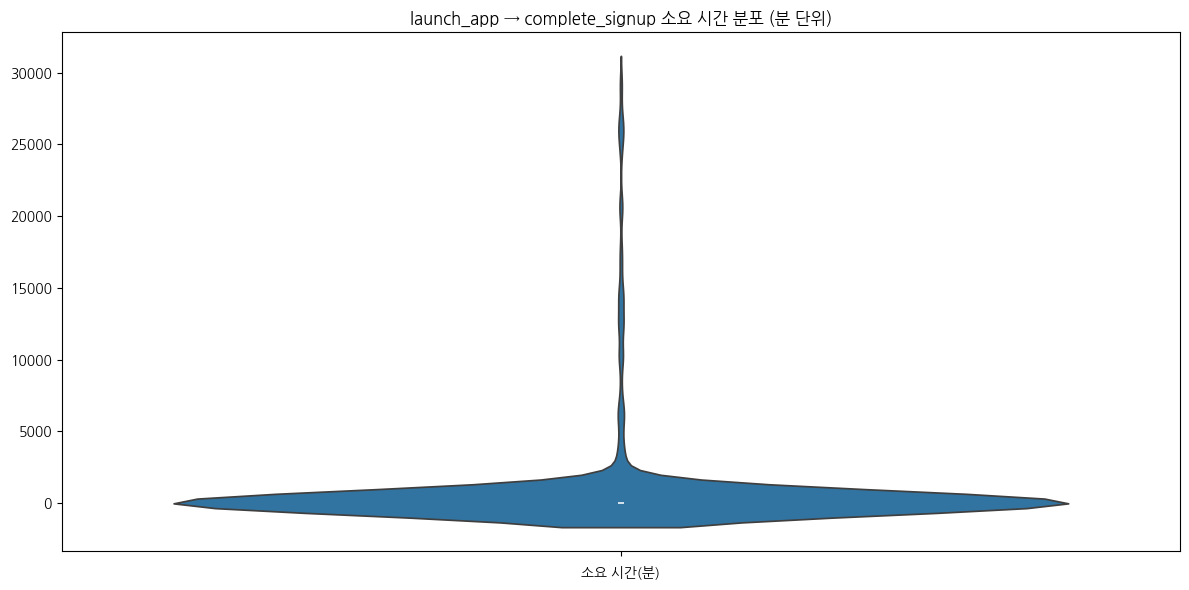

In [19]:
# session_id별로 launch_app과 complete_signup의 시간 차이 구하기 (launch_app이 complete_signup보다 앞선 경우만)

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 launch_app, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # launch_app이 complete_signup보다 앞선 경우만
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"launch_app → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

In [20]:
# 만약 view_signup을 기준으로 하게 된다면?
# 일단 complete_signup 을 가진 session_id들 중 view_signup 가지지 않은 session_id 잇는지 확인

# "complete_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'complete_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "view_signup" 이벤트가 존재하는지 확인
has_view_signup = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"이 있는 session_id 중 "view_signup"이 없는 session_id 개수
num_sessions_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" session 중 "view_signup"이 없는 session 수: {num_sessions_without_view_signup}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "view_signup"이 있었는지 확인
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 view_signup이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_sessions_all_events.groupby('session_id').apply(view_signup_before_signup)
num_sessions_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 없는 session 수: {num_sessions_without_view_signup_before}')
num_sessions_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 있는 session 수: {num_sessions_with_view_signup_before}')

"complete_signup" session 중 "view_signup"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 없는 session 수: 0
"complete_signup" session 중 "complete_signup" 이전에 "view_signup"이 있는 session 수: 973


view_signup → complete_signup 평균 소요 시간: 167.11분
view_signup → complete_signup 중앙값 소요 시간: 1.52분


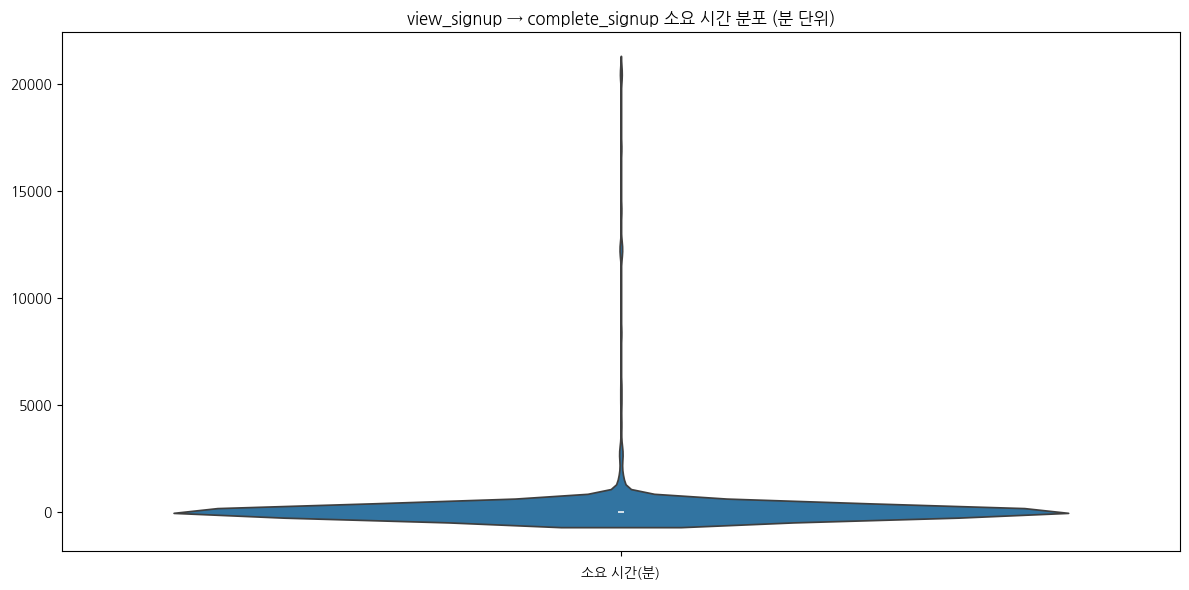

In [21]:
# 해당 결과로는 view_signup이 모두 complete_signup 이전에 있기 때문에 이상이 없음
# session_id 별로 view_signup과 complete_signup 시간 차이 구하기

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 view_signup, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    # view_signup이 complete_signup보다 앞선 경우만
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

#### view_signup 에서 가장 작은 값 -> complete_signup 에서 가장 큰 값
---
- view_signup 에서 첫번재 값은 회원가입을 시도한 것으로 확인 가능
- complete_signup 마지막 값은 회원가입이 최종적으로 완료되었다고 판단 가능

view_signup → complete_signup 평균 소요 시간: 196.39분
view_signup → complete_signup 중앙값 소요 시간: 1.52분


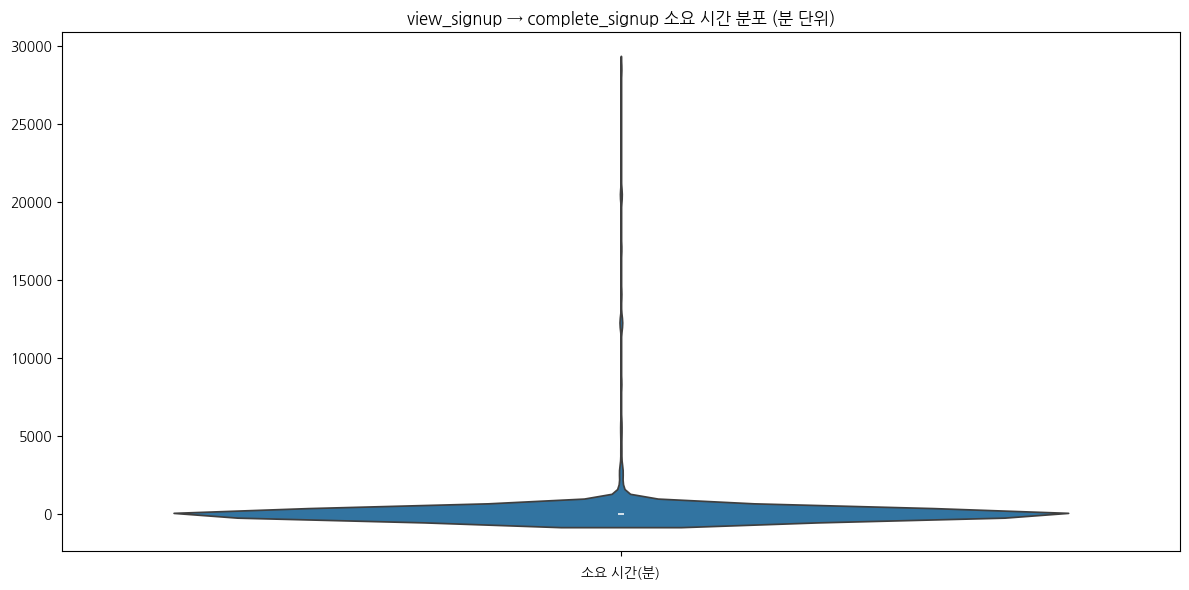

In [22]:
# 해당 결과로는 view_signup이 모두 complete_signup 이전에 있기 때문에 이상이 없음
# session_id 별로 view_signup과 complete_signup 시간 차이 구하기
# view_signup에서는 가장 첫번째 값으로 하고 complete_signup는 가장 마지막 값으로 하여 차이 확인인

def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    # 가장 빠른 view_signup, 가장 빠른 complete_signup
    first_launch = launch_times.iloc[0]
    last_signup = signup_times.iloc[-1]
    # view_signup이 complete_signup보다 앞선 경우만
    if first_launch < last_signup:
        return (last_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

# session_id별 시간 차이 계산
time_diffs = (
    final_hackle_df.groupby('session_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

# 평균, 중앙값
mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"view_signup → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

# 바이올린 플롯 시각화
plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

- 위 결과를 보면 view_signup -> complete_signup 까지 걸리는 시간의 중앙값은 1.52분으로 대략 2분 경과하는 것으로 보임
- launch_app -> complete_signup 을 통해서 앱을 실행하고 회원가입까지 하는데 걸리는 시간은 중앙값은 2.02분으로 대략 2분 경과
-> 이를 통해서 앱을 실행하고 얼마 되지 않아 바로 회원가입하는 유저들이 많을 것으로 유추 가능
- 그렇다면 launch_app -> view_signup까지는 주로 경로는 어떻게 되는걸까?
    - 회원가입하기 전에 뭔가 더 둘러보는 유저는 없는걸까?

+ 추가로 user_id로 살펴볼 필요가 있겠다 지금까지 session_id로 봤는데 user_id로 보면 달라질까?       
- user가 두 번 회원가입하는 경우가 존재하는가?
- session_id로 봤을때랑은 달라지는가?


## user_id로 변경하였을 때 결과가 달라지는가에 대한 탐색
---

In [23]:
# 동일한 user_id에 대해 complete_signup 이벤트가 2번 이상 발생한 경우 확인
user_signup_counts = final_hackle_df[final_hackle_df['event_key'] == 'complete_signup'].groupby('user_id').size()
multiple_signup_users = user_signup_counts[user_signup_counts > 1]

print(f"complete_signup 이벤트가 2번 이상 발생한 user_id 수: {len(multiple_signup_users)}")
print("예시 user_id 및 발생 횟수:")
print(multiple_signup_users.head())

complete_signup 이벤트가 2번 이상 발생한 user_id 수: 2
예시 user_id 및 발생 횟수:
user_id
1579289    2
1579831    2
dtype: int64


In [24]:
# 해당 유저들 확인

display(final_hackle_df[(final_hackle_df.user_id == '1579289') & (final_hackle_df.event_key == "complete_signup")])
display(final_hackle_df[(final_hackle_df.user_id == '1579831') & (final_hackle_df.event_key == "complete_signup")])

,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
1131382,774bede5-4c42-44f7-b0a2-0ee47ffe298b,2023-07-22 21:18:13,complete_signup,aca1b21d-cfe2-4089-9379-0faf9ab6107f,0.0,NaN,300.0,87102,1579289,aca1b21d-cfe2-4089-9379-0faf9ab6107f,Android,10
1734311,636e920e-8772-42fc-84e8-e338667cf9d6,2023-07-22 21:11:16,complete_signup,a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8,0.0,NaN,300.0,225751,1579289,a10275ea-e0f6-4bbc-b3a9-ddebfd412bc8,Android,10


,event_id,event_datetime,event_key,session_id,friend_count,question_id,heart_balance,id,user_id,device_id,osname,osversion
48087,64452779-9565-4d14-b173-c6458227f22e,2023-08-07 19:58:55,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6
48130,6a94e2be-7158-487f-b81f-cd04766a2a37,2023-07-19 01:06:22,complete_signup,B941F9F9-CF53-4DAE-A204-75E666B5D277,0.0,NaN,300.0,80166,1579831,B941F9F9-CF53-4DAE-A204-75E666B5D277,iOS,16.6


In [25]:
ex = final_hackle_df[final_hackle_df["user_id"] == "1579831"].sort_values(by="event_datetime")

# 'ex'의 event_datetime 컬럼에서 날짜별(event_date) 이벤트 수 집계
ex['event_date'] = ex['event_datetime'].dt.date
date_event_counts = ex.groupby('event_date').size()

print(date_event_counts)

event_date
2023-07-19    188
2023-07-23    198
2023-07-24    180
2023-07-25    175
2023-07-26     98
2023-07-27     79
2023-07-29     57
2023-07-30     44
2023-07-31     15
2023-08-01     40
2023-08-02     79
2023-08-04    141
2023-08-05    256
2023-08-06     92
2023-08-07    222
2023-08-08     90
2023-08-09     43
dtype: int64


In [26]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# complete_signup_df에서 제외할 user_id를 제외
filtered_signup_df = complete_signup_df[~complete_signup_df['user_id'].isin(exclude_user_ids)]

# 회원가입 완료 이벤트("complete_signup")가 발생한 user_id 추출
signup_users = filtered_signup_df['user_id'].unique()

# 해당 user_id에 속한 모든 이벤트를 추출
signup_users_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_users)].copy()

# 각 user별로 event_key의 순서를 확인
signup_users_events_sorted = signup_users_events.sort_values(['user_id', 'event_datetime'])

# 예시: 한 user의 event_key 시퀀스 확인
example_user_id = signup_users_events_sorted['user_id'].iloc[0]
example_user_events = signup_users_events_sorted[signup_users_events_sorted['user_id'] == example_user_id]['event_key'].tolist()
print(f"Example user ({example_user_id}) event sequence:")
print(example_user_events)

# 전체적으로 회원가입 전 event_key 시퀀스 집계 (상위 10개 패턴)
# user별 event_key 시퀀스 추출
user_event_sequences = (
    signup_users_events_sorted.groupby('user_id')['event_key']
    .apply(list)
    .reset_index(name='event_sequence')
)

# 시퀀스별로 count 집계
sequence_counts = user_event_sequences['event_sequence'].value_counts().head(10)
print("\nTop 10 signup funnel event sequences (by user):")
for seq, count in sequence_counts.items():
    print(f"{seq} : {count}회")

Example user (1006061) event sequence:
['launch_app', '$session_start', 'launch_app', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click_bottom_navigation_questions', 'click_attendance', 'launch_app', 'click_question_ask', 'click_bottom_navigation_timeline', 'click_bottom_navigation_lab', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'view_lab_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_questions', 'view_lab_tap', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', '$session_end', 'launch_app', '$session_start', 'click_appbar_alarm_center', '$session_end', 'launch_app', '$session_start', 'click_question_share', 'click_question_open', 'click_question_share', 'click_attendance', 'click_question_start', 'skip_question', 'skip_question', 'skip_question', 'complete_question', 'click_bottom_navigation_lab', 'view_lab_tap', 'click_bottom_navigation_profile', 'view_lab_tap', 'click

In [27]:
# complete_signup 바로 직전 event_key를 찾기 위한 코드

# user_id와 event_datetime 기준으로 정렬된 데이터 사용
# 각 session별로 complete_signup 이벤트의 직전 event_key 추출

def get_prev_event_key(df):
    # df: 한 session의 이벤트 시퀀스 (이미 시간순 정렬됨)
    idx = df[df['event_key'] == 'complete_signup'].index
    prev_keys = []
    for i in idx:
        prev_idx = df.index.get_loc(i) - 1
        if prev_idx >= 0:
            prev_keys.append(df.iloc[prev_idx]['event_key'])
    return prev_keys

# user_id 기준으로 그룹화하여 직전 event_key 추출
prev_event_keys = signup_users_events_sorted.groupby('user_id').apply(get_prev_event_key)
# 리스트로 펼치기
prev_event_keys_flat = [item for sublist in prev_event_keys if sublist for item in sublist]

# 결과 집계
prev_event_key_counts = Counter(prev_event_keys_flat)

# 상위 10개 출력
print("complete_signup 바로 직전 event_key Top 10:")
for key, count in prev_event_key_counts.most_common(10):
    print(f"{key}: {count}회")

complete_signup 바로 직전 event_key Top 10:
$session_start: 531회
$session_end: 307회
view_signup: 132회


In [28]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" 이벤트가 있는 user_id 추출 (제외 대상 제외)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# 해당 user_id의 모든 이벤트 추출
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# 각 user_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "complete_signup"이 있는 user_id 중 "launch_app"이 없는 user_id 개수
num_users_without_launch_app = (~has_launch_app).sum()
print(f'"complete_signup" user 중 "launch_app"이 없는 user 수: {num_users_without_launch_app}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_users_all_events.groupby('user_id').apply(launch_app_before_signup)
num_users_without_launch_app_before = (~launch_app_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 없는 user 수: {num_users_without_launch_app_before}')
num_users_with_launch_app_before = (launch_app_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 있는 user 수: {num_users_with_launch_app_before}')

"complete_signup" user 중 "launch_app"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 없는 user 수: 2
"complete_signup" user 중 "complete_signup" 이전에 "launch_app"이 있는 user 수: 968


In [29]:
# complete_signup 이전에 launch_app이 없는 user_id 추출
users_without_launch_app_before = launch_app_before[~launch_app_before].index.tolist()

print(f"complete_signup 이전에 launch_app이 없는 user_id 수: {len(users_without_launch_app_before)}")
print("예시 user_id 5개:", users_without_launch_app_before[:5])

# 해당 user의 이벤트 시퀀스 예시 출력
for user_id in users_without_launch_app_before[:3]:
    events = signup_users_all_events[signup_users_all_events['user_id'] == user_id].sort_values('event_datetime')
    print(f"\nuser ID: {user_id}")
    print(events[['event_datetime', 'event_key']])

complete_signup 이전에 launch_app이 없는 user_id 수: 2
예시 user_id 5개: ['1579154', '1579742']

user ID: 1579154
            event_datetime                  event_key
764190 2023-07-20 20:48:01             $session_start
764236 2023-07-20 20:48:37                view_signup
764200 2023-07-20 20:48:43                view_signup
764227 2023-07-20 20:48:46                view_signup
764221 2023-07-20 20:48:49                view_signup
...                    ...                        ...
764194 2023-07-22 11:32:45  click_appbar_alarm_center
764252 2023-07-22 11:32:47    click_appbar_chat_rooms
764198 2023-07-22 11:32:50               $session_end
764185 2023-07-22 11:32:50       click_appbar_setting
764205 2023-07-22 11:33:08             $session_start

[82 rows x 2 columns]

user ID: 1579742
             event_datetime                        event_key
4430933 2023-08-05 16:30:11                   $session_start
4430983 2023-08-05 16:30:47                      view_signup
4430978 2023-08-05 16:30

launch_app → complete_signup 평균 소요 시간: 669.63분
launch_app → complete_signup 중앙값 소요 시간: 2.01분


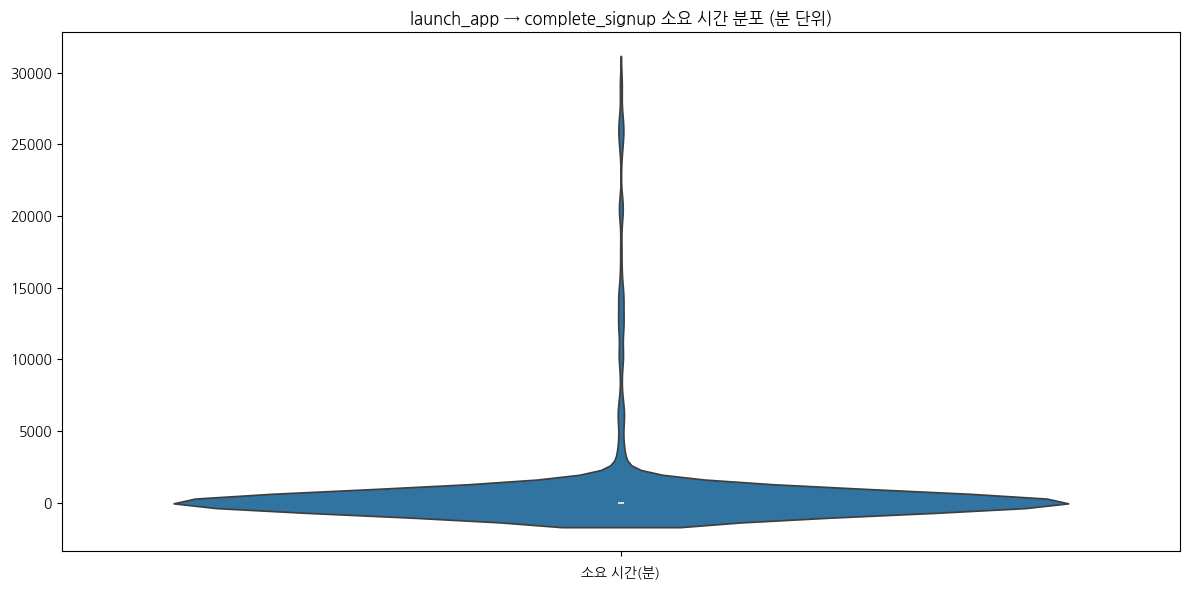

In [30]:
# 제외할 user_id 리스트 (두 번 회원가입한 유저 + launch_app 없는 유저)
exclude_user_ids = ['1579289', '1579831'] + users_without_launch_app_before

# 제외 대상이 아닌 user_id만 추출
filtered_signup_users = [uid for uid in signup_users if uid not in exclude_user_ids]

# 해당 user_id의 모든 이벤트 추출
filtered_signup_users_events = signup_users_all_events[signup_users_all_events['user_id'].isin(filtered_signup_users)].copy()

# user_id별로 launch_app과 complete_signup의 시간 차이 계산 (launch_app이 complete_signup보다 앞선 경우만)
def get_launch_signup_time_diff(df):
    df_sorted = df.sort_values('event_datetime')
    launch_times = df_sorted.loc[df_sorted['event_key'] == 'launch_app', 'event_datetime']
    signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if launch_times.empty or signup_times.empty:
        return np.nan
    first_launch = launch_times.iloc[0]
    first_signup = signup_times.iloc[0]
    if first_launch < first_signup:
        return (first_signup - first_launch).total_seconds() / 60  # 분 단위
    else:
        return np.nan

time_diffs = (
    filtered_signup_users_events.groupby('user_id')
    .apply(get_launch_signup_time_diff)
    .dropna()
)

mean_diff = time_diffs.mean()
median_diff = time_diffs.median()
print(f"launch_app → complete_signup 평균 소요 시간: {mean_diff:.2f}분")
print(f"launch_app → complete_signup 중앙값 소요 시간: {median_diff:.2f}분")

plt.figure(figsize=(12, 6))
sns.violinplot(data=time_diffs)
plt.title('launch_app → complete_signup 소요 시간 분포 (분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

In [31]:
# 제외할 user_id 리스트 (예: 두 번 회원가입한 유저)
exclude_user_ids = ['1579289', '1579831']

# "complete_signup" 이벤트가 있는 user_id 추출 (제외 대상 제외)
signup_user_ids = final_hackle_df.loc[
    (final_hackle_df['event_key'] == 'complete_signup') &
    (~final_hackle_df['user_id'].isin(exclude_user_ids)),
    'user_id'
].unique()

# 해당 user_id의 모든 이벤트 추출
signup_users_all_events = final_hackle_df[final_hackle_df['user_id'].isin(signup_user_ids)]

# 각 user_id별로 "view_signup" 이벤트가 존재하는지 확인
has_view_signup = signup_users_all_events.groupby('user_id')['event_key'].apply(lambda x: 'view_signup' in x.values)

# "complete_signup"이 있는 user_id 중 "view_signup"이 없는 user_id 개수
num_users_without_view_signup = (~has_view_signup).sum()
print(f'"complete_signup" user 중 "view_signup"이 없는 user 수: {num_users_without_view_signup}')

# "complete_signup" 이벤트가 발생한 시점 이전에 "view_signup"이 있었는지 확인
def view_signup_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'complete_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 view_signup이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'view_signup').any()

view_signup_before = signup_users_all_events.groupby('user_id').apply(view_signup_before_signup)
num_users_without_view_signup_before = (~view_signup_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 없는 user 수: {num_users_without_view_signup_before}')
num_users_with_view_signup_before = (view_signup_before).sum()
print(f'"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 있는 user 수: {num_users_with_view_signup_before}')

"complete_signup" user 중 "view_signup"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 없는 user 수: 0
"complete_signup" user 중 "complete_signup" 이전에 "view_signup"이 있는 user 수: 970


view_signup → complete_signup (2회 가입 유저 제외) 평균 소요 시간: 170.91분
view_signup → complete_signup (2회 가입 유저 제외) 중앙값 소요 시간: 1.51분


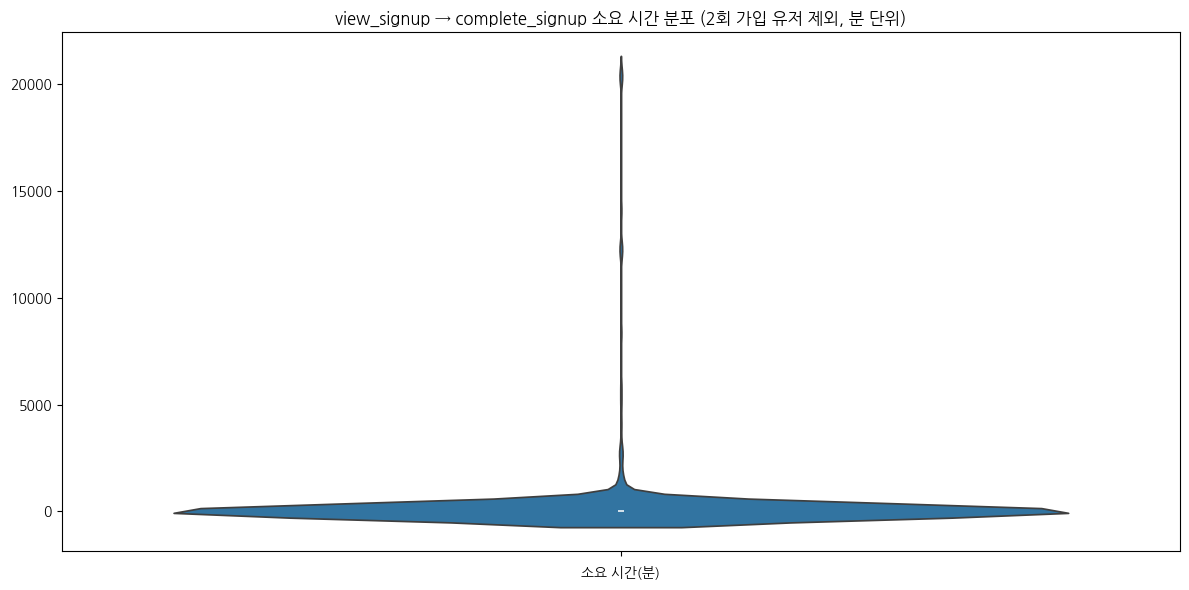

In [32]:
# 2번 회원가입한 유저 제외 (user_id: '1579289', '1579831')
exclude_user_ids = ['1579289', '1579831']

# 제외 대상이 아닌 user_id만 추출
filtered_user_ids = [uid for uid in signup_user_ids if uid not in exclude_user_ids]

# 해당 user_id의 모든 이벤트 추출
filtered_events = signup_users_all_events[signup_users_all_events['user_id'].isin(filtered_user_ids)].copy()

# user_id별로 view_signup과 complete_signup 시간 차이 계산
def get_view_signup_to_complete_signup_time(df):
    df_sorted = df.sort_values('event_datetime')
    view_signup_times = df_sorted.loc[df_sorted['event_key'] == 'view_signup', 'event_datetime']
    complete_signup_times = df_sorted.loc[df_sorted['event_key'] == 'complete_signup', 'event_datetime']
    if view_signup_times.empty or complete_signup_times.empty:
        return np.nan
    first_view_signup = view_signup_times.iloc[0]
    first_complete_signup = complete_signup_times.iloc[0]
    if first_view_signup < first_complete_signup:
        return (first_complete_signup - first_view_signup).total_seconds() / 60  # 분 단위
    else:
        return np.nan

filtered_time_diffs = (
    filtered_events.groupby('user_id')
    .apply(get_view_signup_to_complete_signup_time)
    .dropna()
)

mean_diff = filtered_time_diffs.mean()
median_diff = filtered_time_diffs.median()
print(f"view_signup → complete_signup (2회 가입 유저 제외) 평균 소요 시간: {mean_diff:.2f}분")
print(f"view_signup → complete_signup (2회 가입 유저 제외) 중앙값 소요 시간: {median_diff:.2f}분")

plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_time_diffs)
plt.title('view_signup → complete_signup 소요 시간 분포 (2회 가입 유저 제외, 분 단위)')
plt.xlabel('소요 시간(분)')
plt.tight_layout()
plt.show()

세션으로 묶거나 user로 묶거나 크게 차이가 발생하진 않음     
-> 목적에 따라서 기준을 정할 듯함       
-> 특이 사항으로 2번 회원가입한 유저 및 값을 유추할 수 없는 경우 제외함     
    + 아직 그래프 색상 및 라벨 등의 크기를 변경하진 않음

#### 추가로 탐색/검증해볼 수 있는 가설 및 분석 아이디어
(느낌표 붙인 것들 진행 예정정)
- 앱 실행 후 즉시 회원가입하는 유저 비율이 높다: launch_app → complete_signup 소요 시간이 매우 짧은 유저와 그렇지 않은 유저의 특성(재방문율, 이탈률 등) 비교
- 회원가입 시도(view_signup) 후 실제 완료(complete_signup)까지 이탈 구간 존재: view_signup 이후 complete_signup까지 도달하지 못한 유저의 행동 패턴 분석
- 요일/시간대별 가입 패턴 차이: 평일/주말, 특정 시간대(예: 밤/점심)별 가입률 및 이후 활성화율 비교!!!!
- 기기/OS별 가입 경로 차이: Android/iOS, OS 버전별 회원가입 funnel 및 소요 시간 차이 분석!!!!
- 회원가입 전 주요 이탈 이벤트: complete_signup 직전 이벤트가 무엇인지, 반복적으로 등장하는 이탈 지점 파악
- 가입 이후 첫 행동과 장기 잔존율의 관계: 가입 직후 이벤트(예: 친구추가, 질문참여 등)에 따라 이후 활동성/잔존율 차이 분석!!!!
- 중복 가입/재가입 유저의 특성: 탈퇴 후 재가입 유저의 행동 패턴 및 기존 유저와의 차이
- launch_app → view_signup 사이 행동 다양성: 회원가입 페이지 진입 전 다양한 탐색 행동(예: 질문 보기, 타임라인 보기 등) 유형화
- 지역/시간대 기반 분석: 지역별(도시/시/군/구 등) 가입자 분포 및 시간대별 패턴 차이
- 친구 수/하트 잔고 등 초기 상태와 가입 소요 시간의 상관관계

In [33]:
# 활성화율 계산 방식 설명
# summary['activation_rate'] = summary['activated'] / summary['signups']
# 즉, 각 그룹(평일/주말, 시간대)별로 회원가입자 중 '활성화 이벤트'를 한 유저 비율입니다.

# 회원가입 이후 최초 5개 이벤트 집계 (가입자별)
# 1. accounts_user의 id와 user_id가 동일하므로, 가입 시각 이후의 이벤트만 추출
# 2. 각 가입자별로 가입 이후 발생한 이벤트 중 상위 5개를 집계

In [34]:
# 문제 원인: signup_users_events_after_signup이 빈 데이터프레임인 이유는
# accounts_user['id']와 signup_users_all_events['user_id']의 타입 또는 값이 정확히 일치하지 않거나,
# signup_time.get(row['user_id'], pd.NaT)에서 user_id가 없어서 모두 NaT가 반환될 수 있습니다.

# 1. user_id와 id의 타입을 모두 str로 맞추기
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. 가입 시각 정보 준비 (id를 str로)
signup_time = accounts_user.set_index('id')['created_at_plus_9'].astype('datetime64[ns]')

# 3. 가입자별 가입 이후 이벤트만 추출
signup_users_events_after_signup = signup_users_all_events[
    signup_users_all_events.apply(
        lambda row: pd.to_datetime(row['event_datetime']) >= signup_time.get(str(row['user_id']), pd.NaT), axis=1
    )
]

# 4. 가입자별 가입 이후 최초 5개 이벤트 추출
first5_events = (
    signup_users_events_after_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 5. 이벤트별 빈도 집계
event_counts = first5_events['event_key'].value_counts()
print("회원가입 이후 최초 5개 이벤트별 빈도:")
print(event_counts.head(20))

/tmp/ipykernel_63807/2109964041.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


회원가입 이후 최초 5개 이벤트별 빈도:
event_key
$session_start                       570
complete_signup                      553
view_timeline_tap                    507
view_lab_tap                         478
click_bottom_navigation_timeline     270
click_bottom_navigation_profile      244
click_bottom_navigation_questions    235
click_question_start                 226
skip_question                        183
click_bottom_navigation_lab          144
view_profile_tap                     111
launch_app                           105
click_question_ask                    84
complete_question                     68
view_questions_tap                    64
$session_end                          60
click_appbar_chat_rooms               31
click_attendance                      27
click_appbar_friend_plus              17
view_signup                           14
Name: count, dtype: int64


In [35]:
# user_id별로 complete_signup이 여러 번 있는 경우, 마지막 complete_signup 이후 5개 이벤트만 집계

# 1. user_id와 id의 타입을 모두 str로 맞추기 (이미 맞춰져 있으면 생략 가능)
accounts_user['id'] = accounts_user['id'].astype(str)
signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)

# 2. 가입 시각 정보 준비 (id를 str로)
signup_time = accounts_user.set_index('id')['created_at_plus_9'].astype('datetime64[ns]')

# 3. user_id별로 마지막 complete_signup 시각 추출
last_signup_time = (
    signup_users_all_events[signup_users_all_events['event_key'] == 'complete_signup']
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')['event_datetime']
    .max()
)

# 4. 마지막 complete_signup 이후 이벤트만 추출
def after_last_signup(df):
    uid = df['user_id'].iloc[0]
    last_time = last_signup_time.get(uid, pd.NaT)
    if pd.isna(last_time):
        return pd.DataFrame()
    return df[df['event_datetime'] > last_time]

signup_users_events_sorted = signup_users_all_events.sort_values(['user_id', 'event_datetime'])
events_after_last_signup = (
    signup_users_events_sorted.groupby('user_id', group_keys=False)
    .apply(after_last_signup)
)

# 5. user_id별로 마지막 complete_signup 이후 최초 5개 이벤트 추출
first5_events_after_last_signup = (
    events_after_last_signup
    .sort_values(['user_id', 'event_datetime'])
    .groupby('user_id')
    .head(5)
)

# 6. 이벤트별 빈도 집계
event_counts = first5_events_after_last_signup['event_key'].value_counts()
print("마지막 complete_signup 이후 최초 5개 이벤트별 빈도:")
print(event_counts.head(20))

/tmp/ipykernel_63807/245444692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signup_users_all_events['user_id'] = signup_users_all_events['user_id'].astype(str)


마지막 complete_signup 이후 최초 5개 이벤트별 빈도:
event_key
view_lab_tap                         781
view_timeline_tap                    754
click_bottom_navigation_profile      408
click_bottom_navigation_timeline     387
click_bottom_navigation_questions    382
click_bottom_navigation_lab          287
skip_question                        282
click_question_start                 264
view_profile_tap                     220
click_question_ask                   125
launch_app                           125
view_questions_tap                   112
complete_question                     97
$session_end                          71
$session_start                        64
click_appbar_chat_rooms               42
click_appbar_setting                  37
click_attendance                      32
click_appbar_friend_plus              31
view_signup                           21
Name: count, dtype: int64


위 경우를 보면 생각보다 실험실 탭에 들어가는 경우가 많은데 그렇다면 실험실에 다양한 기능이 있는지 확인 및 해보고 싶은 행동들이 있을 수 잇음     
-> 실험실에 대해서 만족도 == 실험실에 머무는 시간이 긴가?
- 실험실 탭에 들어가서 머무는 시간이 긴 유저와 짧은 유저의 차이?

   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        102         0.001891
1       False     Night   178965        232         0.001296
2       False     Other   211760        275         0.001299
3        True     Lunch    37907         32         0.000844
4        True     Night    99098         80         0.000807
5        True     Other    95425         77         0.000807


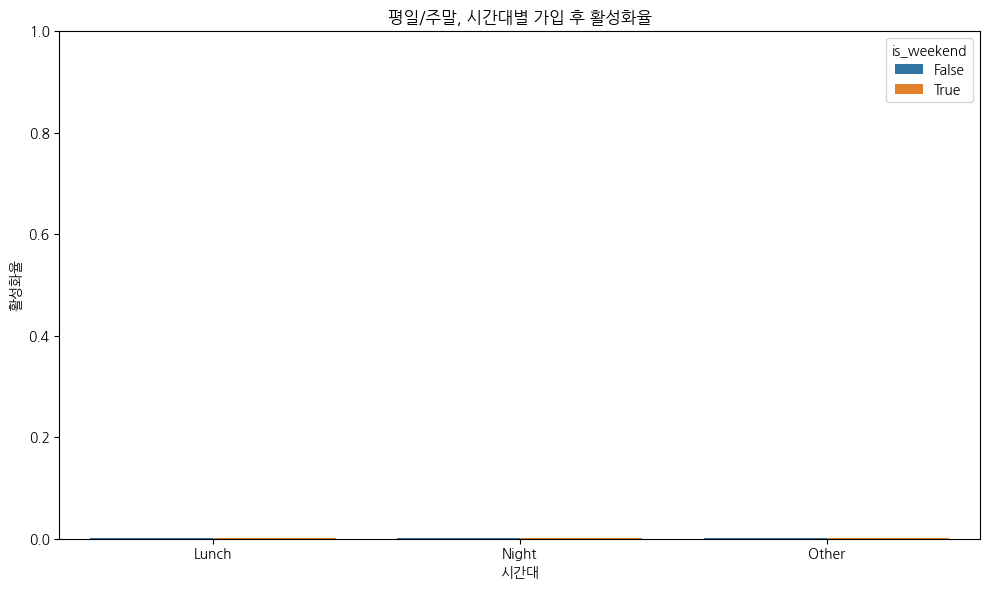

In [36]:
# 평일/주말, 시간대별 가입자 수 및 이후 활성화율(예: 첫 활성화 이벤트 발생 비율) 비교

# 1. 가입자 데이터에서 요일/시간대 컬럼 생성
accounts_user['weekday'] = accounts_user['created_at_plus_9'].dt.day_name()
accounts_user['hour'] = accounts_user['created_at_plus_9'].dt.hour

# 평일/주말 구분
accounts_user['is_weekend'] = accounts_user['weekday'].isin(['Saturday', 'Sunday'])

# 시간대 구분 (예: 밤(21~6), 점심(11~14), 기타)
def time_slot(hour):
    if 21 <= hour or hour < 6:
        return 'Night'
    elif 11 <= hour < 15:
        return 'Lunch'
    else:
        return 'Other'
accounts_user['time_slot'] = accounts_user['hour'].apply(time_slot)

# 2. 가입자별 첫 활성화(Activation) 이벤트 발생 여부 집계
activation_keys = ['view_lab_tap', 'click_bottom_navigation_questions', 'click_bottom_navigation_timeline'
                   ,'view_timeline_tap', 'click_bottom_navigation_profile', 'click_bottom_navigation_lab'
                   , 'skip_question', 'click_question_start', 'view_profile_tap','click_question_ask']

# 가입자 user_id별로 첫 활성화 이벤트 발생 여부
activation_df = signup_users_all_events[signup_users_all_events['event_key'].isin(activation_keys)]
activated_users = activation_df['user_id'].unique()
accounts_user['activated'] = accounts_user['id'].astype(str).isin(activated_users)

# 3. 평일/주말, 시간대별 가입자 수 및 활성화율 집계
summary = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated', 'sum'))
    .reset_index()
)
summary['activation_rate'] = summary['activated'] / summary['signups']

print(summary)

# 4. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x='time_slot',
    y='activation_rate',
    hue='is_weekend'
)
plt.title('평일/주말, 시간대별 가입 후 활성화율')
plt.ylabel('활성화율')
plt.xlabel('시간대')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

활성화 이벤트(activation_keys)에 포함된 이벤트가 너무 제한적이거나, 실제로 가입 직후 발생하는 이벤트와 맞지 않을 수 있습니다. 또는 'activated' 조건이 너무 엄격할 수 있습니다.

In [37]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 5분 이내 이벤트 필터링
events['within_5min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=5))
)

# 4. 5분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_5min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_5min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_5min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_5min', 'sum'))
    .reset_index()
)
summary_5min['activation_rate'] = summary_5min['activated'] / summary_5min['signups']

print(summary_5min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104         0.001928
1       False     Night   178965        239         0.001335
2       False     Other   211760        276         0.001303
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870


In [38]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 10분 이내 이벤트 필터링
events['within_10min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=10))
)

# 4. 10분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_10min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_10min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_10min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_10min', 'sum'))
    .reset_index()
)
summary_10min['activation_rate'] = summary_10min['activated'] / summary_10min['signups']

print(summary_10min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105         0.001947
1       False     Night   178965        240         0.001341
2       False     Other   211760        278         0.001313
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870


In [39]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 30분 이내 이벤트 필터링
events['within_30min'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(minutes=30))
)

# 4. 30분 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_30min'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_30min'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_30min = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_30min', 'sum'))
    .reset_index()
)
summary_30min['activation_rate'] = summary_30min['activated'] / summary_30min['signups']

print(summary_30min)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105         0.001947
1       False     Night   178965        241         0.001347
2       False     Other   211760        278         0.001313
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870


In [40]:
# 1. 가입 시각 추출
signup_time = accounts_user[['id', 'created_at_plus_9']].copy()
signup_time['created_at_plus_9'] = pd.to_datetime(signup_time['created_at_plus_9'])
signup_time = signup_time.rename(columns={'id': 'user_id', 'created_at_plus_9': 'signup_time'})

# 2. 이벤트 테이블과 가입 시각 조인
events = signup_users_all_events.copy()
events['event_datetime'] = pd.to_datetime(events['event_datetime'])
events = events.merge(signup_time, on='user_id', how='left')

# 3. 가입 후 1시간 이내 이벤트 필터링
events['within_1hour'] = (
    (events['event_datetime'] > events['signup_time']) &
    (events['event_datetime'] <= events['signup_time'] + pd.Timedelta(hours=1))
)

# 4. 1시간 이내 이벤트가 있는 user_id 추출
activated_users = events.loc[events['within_1hour'], 'user_id'].drop_duplicates()

# 5. 활성화 여부 컬럼 생성
accounts_user['activated_1hour'] = accounts_user['id'].astype(str).isin(activated_users)

# 6. 그룹별 활성화율 집계
summary_1hour = (
    accounts_user
    .groupby(['is_weekend', 'time_slot'])
    .agg(signups=('id', 'count'), activated=('activated_1hour', 'sum'))
    .reset_index()
)
summary_1hour['activation_rate'] = summary_1hour['activated'] / summary_1hour['signups']

print(summary_1hour)


   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105         0.001947
1       False     Night   178965        241         0.001347
2       False     Other   211760        278         0.001313
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         77         0.000777
5        True     Other    95425         83         0.000870


In [41]:
events_copy = events.copy()
accounts_copy = accounts_user.copy()

In [42]:
def time_event_activation_summary(time_unit: str, amount: int):
    # time_unit: 'minutes' 또는 'hours'
    delta = pd.Timedelta(**{time_unit: amount})  # 동적으로 처리
    

    # 3. 가입 후 지정 시간 이내 이벤트 필터링
    events_copy['within_time'] = (
        (events_copy['event_datetime'] > events_copy['signup_time']) &
        (events_copy['event_datetime'] <= events_copy['signup_time'] + delta)
    )
    
    # 4. 해당 시간 내 이벤트가 있는 user_id 추출
    activated_users = events_copy.loc[events_copy['within_time'], 'user_id'].drop_duplicates()

    # 5. 활성화 여부 컬럼 생성
    accounts_copy['activated_time'] = accounts_copy['id'].astype(str).isin(activated_users)

    # 6. 그룹별 활성화율 집계
    summary_time = (
        accounts_copy
        .groupby(['is_weekend', 'time_slot'])
        .agg(signups=('id', 'count'), activated=('activated_time', 'sum'))
        .reset_index()
    )
    summary_time['activation_rate'] = summary_time['activated'] / summary_time['signups']
    
    print(f"== 가입 후 {amount} {time_unit} 내 활성화 ==")
    print(summary_time)
    print("="*60)

In [43]:
time_event_activation_summary('minutes', 5)
time_event_activation_summary('minutes', 10)
time_event_activation_summary('minutes', 30)
time_event_activation_summary('hours', 1)

== 가입 후 5 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        104         0.001928
1       False     Night   178965        239         0.001335
2       False     Other   211760        276         0.001303
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870
== 가입 후 10 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0       False     Lunch    53930        105         0.001947
1       False     Night   178965        240         0.001341
2       False     Other   211760        278         0.001313
3        True     Lunch    37907         30         0.000791
4        True     Night    99098         76         0.000767
5        True     Other    95425         83         0.000870
== 가입 후 30 minutes 내 활성화 ==
   is_weekend time_slot  signups  activated  activation_rate
0 

가입 후 5~60분까지의 반응을 분석한 결과, 대부분의 유저는 가입 이후 아무 이벤트도 발생시키지 않는 것으로 나타났습니다.       
시간 기준을 5분 → 1시간으로 넓혀도 활성화율 증가는 0.001%p 수준에 불과했습니다.

특히, 평일에 비해 주말 유저의 활성화율이 더 낮아, 유입 품질 또는 초기 온보딩 구조 개선이 필요해 보입니다.       
이는 단순한 대기 시간의 문제라기보다는, 근본적으로 '가입만 하고 이탈하는 유저' 비중이 높은 것으로 해석됩니다.

In [44]:
# 1. 실험실 탭 진입 이벤트를 정의 (예: 'view_lab_tap' 또는 'click_bottom_navigation_lab' 등)
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']

# 2. 회원가입 완료한 유저(user_id) 중 실험실 탭에 한번이라도 들어간 유저 추출
lab_users = signup_users_all_events[signup_users_all_events['event_key'].isin(lab_tab_events)]['user_id'].unique()

# 3. 전체 회원가입 완료 유저 수
total_signup_users = accounts_user['id'].astype(str).nunique()

# 4. 실험실 탭 진입 유저 수
lab_users_count = len(lab_users)

# 5. 비율 계산
lab_user_ratio = lab_users_count / total_signup_users * 100
print(f"회원가입 완료 유저 중 실험실 탭에 한번이라도 들어간 유저 비율: {lab_user_ratio:.2f}% ({lab_users_count}/{total_signup_users})")

# 6. 실험실 탭 진입 유저의 회원가입 일자 추출
lab_users_signup_dates = accounts_user[accounts_user['id'].astype(str).isin(lab_users)][['id', 'created_at_plus_9']]
print("실험실 탭 진입 유저의 회원가입 일자(상위 10개):")
print(lab_users_signup_dates.head(10))

회원가입 완료 유저 중 실험실 탭에 한번이라도 들어간 유저 비율: 0.13% (903/677085)
실험실 탭 진입 유저의 회원가입 일자(상위 10개):
             id          created_at_plus_9
72498    923658 2023-05-06 23:58:56.451591
113297   967617 2023-05-07 21:59:18.841842
149013  1006061 2023-05-08 20:39:06.627464
326836  1199005 2023-05-13 14:34:29.760474
342954  1216565 2023-05-13 21:00:16.936982
387777  1265729 2023-05-14 22:43:19.358770
400739  1279934 2023-05-15 15:16:11.978139
441807  1324867 2023-05-16 21:27:32.600137
502317  1391728 2023-05-20 00:51:35.212829
631289  1534869 2023-05-28 16:56:12.336732


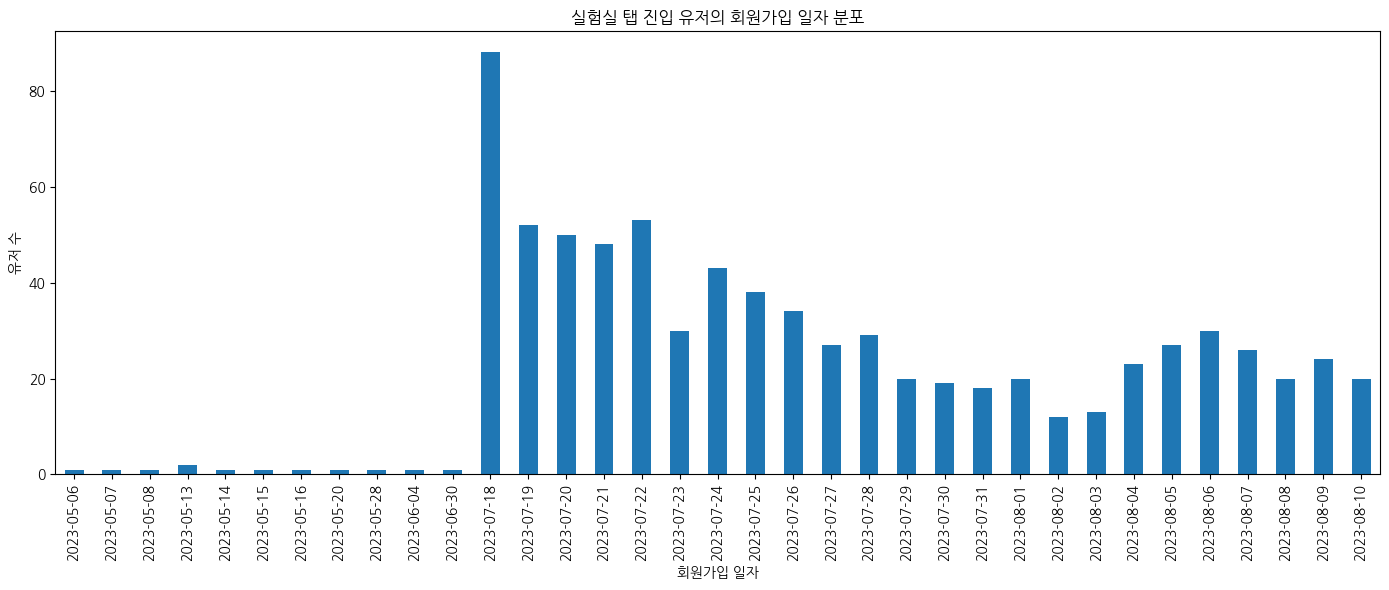

실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 평균 소요 시간: 1528.93분
실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 중앙값 소요 시간: 1.34분


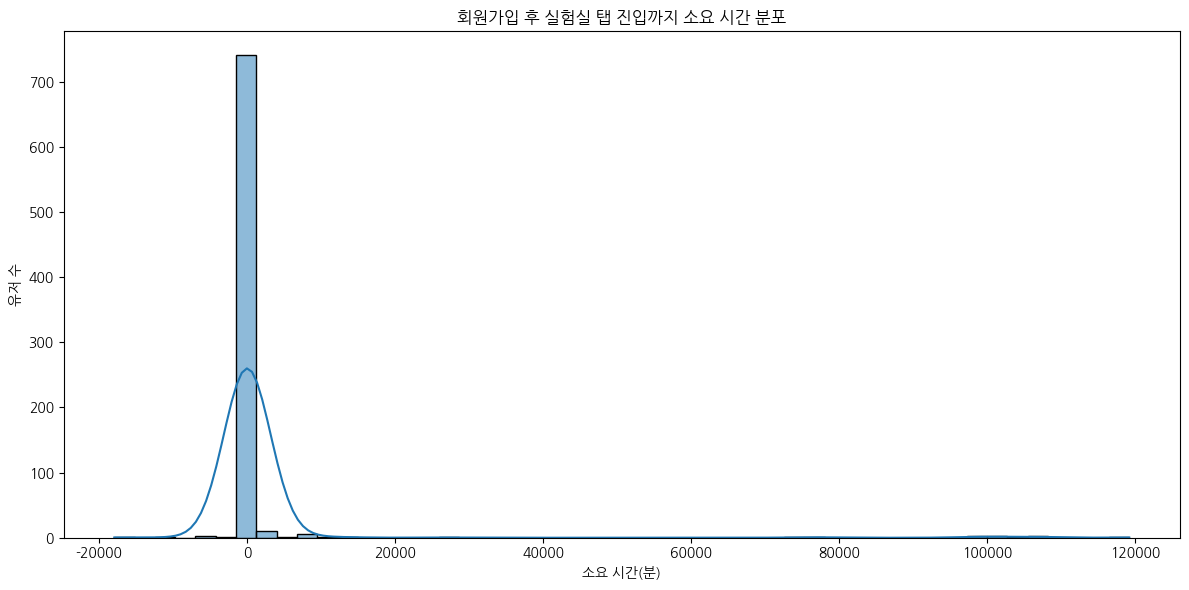

In [45]:
# 실험실 탭 진입 유저의 회원가입 일자 시각화
plt.figure(figsize=(14, 6))
lab_users_signup_dates['created_at_plus_9'].dt.date.value_counts().sort_index().plot(kind='bar')
plt.title('실험실 탭 진입 유저의 회원가입 일자 분포')
plt.xlabel('회원가입 일자')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 걸린 시간(분) 계산
# 1. 실험실 탭 진입 이벤트만 추출
lab_events = signup_users_all_events[signup_users_all_events['user_id'].isin(lab_users) &
                                    signup_users_all_events['event_key'].isin(lab_tab_events)].copy()

# 2. 회원가입 일자 정보 merge
lab_events = lab_events.merge(
    lab_users_signup_dates.rename(columns={'id': 'user_id'}),
    on='user_id',
    how='left'
)

# 3. 회원가입 후 실험실 탭 진입까지 걸린 시간(분) 계산 (최초 진입만)
lab_events['signup_to_lab_min'] = (lab_events['event_datetime'] - lab_events['created_at_plus_9']).dt.total_seconds() / 60
first_lab_events = lab_events.sort_values(['user_id', 'event_datetime']).groupby('user_id').first()

# 4. 평균, 중앙값 출력
mean_time = first_lab_events['signup_to_lab_min'].mean()
median_time = first_lab_events['signup_to_lab_min'].median()
print(f"실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 평균 소요 시간: {mean_time:.2f}분")
print(f"실험실 탭 진입 유저의 회원가입 후 실험실 탭 진입까지 중앙값 소요 시간: {median_time:.2f}분")

# 5. 분포 시각화
plt.figure(figsize=(12, 6))
sns.histplot(first_lab_events['signup_to_lab_min'], bins=50, kde=True)
plt.title('회원가입 후 실험실 탭 진입까지 소요 시간 분포')
plt.xlabel('소요 시간(분)')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

In [46]:
# 1. 실험실 관련 이벤트가 7월 18일 이전에 있었는지 확인
lab_tab_events = ['view_lab_tap', 'click_bottom_navigation_lab']
lab_events_before_july18 = signup_users_events[ 
    (signup_users_events['event_key'].isin(lab_tab_events)) &
    (signup_users_events['event_datetime'] < pd.Timestamp('2023-07-18'))
]
print(f"7월 18일 이전 실험실 관련 이벤트 수: {len(lab_events_before_july18)}")
if not lab_events_before_july18.empty:
    display(lab_events_before_july18[['event_datetime', 'event_key', 'user_id']].head())

7월 18일 이전 실험실 관련 이벤트 수: 0


In [47]:
# signup_users_events 데이터프레임에서 가장 많이 발생한 이벤트 확인
event_counts = signup_users_events['event_key'].value_counts()
print("가장 많이 발생한 이벤트 Top 10:")
print(event_counts.head(10))

가장 많이 발생한 이벤트 Top 10:
event_key
view_lab_tap                         21946
view_timeline_tap                    21016
click_question_open                  19641
launch_app                           14839
$session_start                       13603
click_bottom_navigation_questions    13243
skip_question                        13161
$session_end                         12075
click_bottom_navigation_profile      11866
click_bottom_navigation_timeline      8273
Name: count, dtype: int64


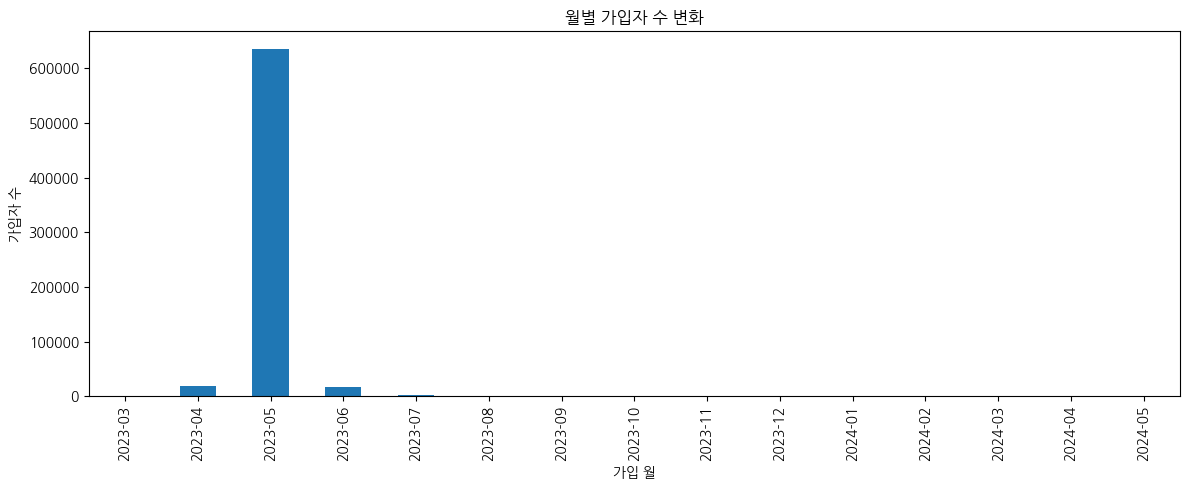

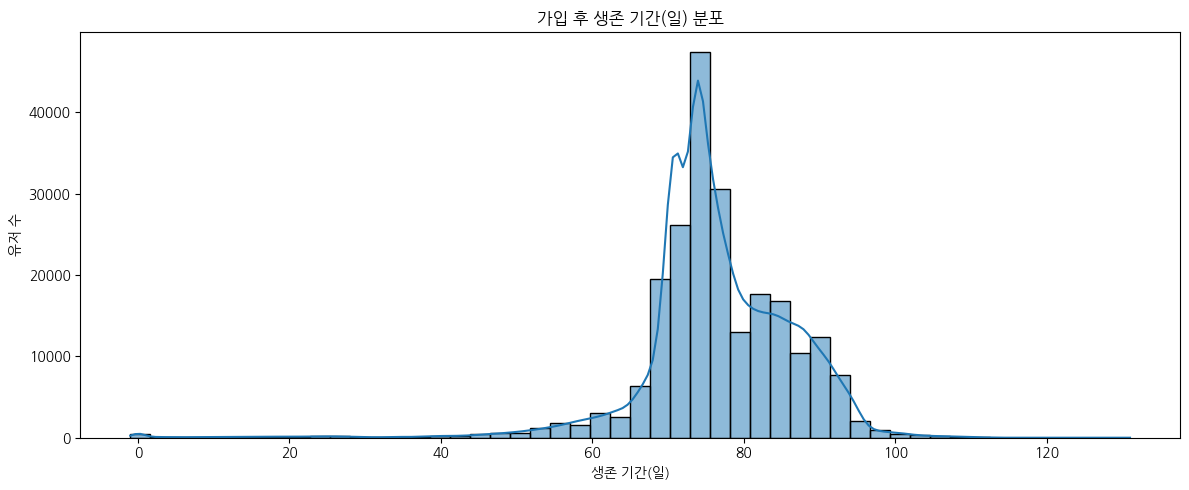

생존 기간 평균: 76.40일
생존 기간 중간값: 75.00일
30일 이상 잔존 유저 수: 125175


In [55]:
# 가입자 수 변화(5~6월 급증) 및 가입 후 생존 기간, 장기 잔존 유저 코호트 정의

# accounts_user: vote 데이터(가입자 정보)
# final_hackle_df: 행동 로그 데이터

# 1. 가입자 수 변화 (월별)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()
plt.figure(figsize=(12, 5))
monthly_signup_counts.plot(kind='bar')
plt.title('월별 가입자 수 변화')
plt.xlabel('가입 월')
plt.ylabel('가입자 수')
plt.tight_layout()
plt.show()

# 2. 가입 후 생존 기간 계산 (최종 이벤트 시각 - 가입 시각)
user_last_event = final_hackle_df.groupby('user_id')['event_datetime'].max()
accounts_user['user_id'] = accounts_user['id'].astype(str)
accounts_user['last_event_time'] = accounts_user['user_id'].map(user_last_event)
accounts_user['survival_days'] = (accounts_user['last_event_time'] - accounts_user['created_at_plus_9']).dt.days

# 3. 생존 기간별 유저의 수 시각화 및 통계치 출력
plt.figure(figsize=(12, 5))
sns.histplot(accounts_user['survival_days'].dropna(), bins=50, kde=True)
plt.title('가입 후 생존 기간(일) 분포')
plt.xlabel('생존 기간(일)')
plt.ylabel('유저 수')
plt.tight_layout()
plt.show()

# 생존 기간의 평균, 중간값 계산
mean_survival = accounts_user['survival_days'].mean()
median_survival = accounts_user['survival_days'].median()
print(f"생존 기간 평균: {mean_survival:.2f}일")
print(f"생존 기간 중간값: {median_survival:.2f}일")

# 4. 장기 잔존 유저(예: 가입 후 30일 이상 활동) 정의
accounts_user['is_retained_median_day'] = accounts_user['survival_days'] >= median_survival
retained_users = accounts_user.loc[accounts_user['is_retained_median_day'], 'user_id'].tolist()
print(f"30일 이상 잔존 유저 수: {len(retained_users)}")

In [53]:
# 잔존 유저의 행동 패턴 분석 (final_hackle 데이터)
retained_events = final_hackle_df[final_hackle_df['user_id'].isin(retained_users)].copy()

# 잔존 유저의 주요 이벤트 빈도
top_events = retained_events['event_key'].value_counts().head(10)
print("잔존 유저 주요 이벤트 Top 10:")
print(top_events)

# # 잔존 유저별 첫 10개 이벤트 시퀀스
# retained_event_sequences = (
#     retained_events.sort_values(['user_id', 'event_datetime'])
#     .groupby('user_id')['event_key']
#     .apply(lambda x: list(x.head(10)))
# )
# print("잔존 유저 첫 10개 이벤트 시퀀스 예시:")
# print(retained_event_sequences.head())

잔존 유저 주요 이벤트 Top 10:
event_key
view_lab_tap                         735569
view_timeline_tap                    715591
launch_app                           575388
$session_start                       573226
click_question_open                  463651
click_bottom_navigation_questions    414263
$session_end                         377129
click_bottom_navigation_profile      372031
click_bottom_navigation_timeline     308316
skip_question                        288797
Name: count, dtype: int64


In [50]:
question_key = []
for key in list(final_hackle_df.event_key.unique()):
    if "question" in key:
        question_key.append(key)
question_key

['click_question_open',
 'click_bottom_navigation_questions',
 'view_questions_tap',
 'click_question_share',
 'complete_question',
 'click_question_start',
 'skip_question',
 'click_question_ask']

In [51]:
question_key = [event_name for event_name in list(final_hackle_df.event_key.unique()) if "question" in event_name]

In [66]:
# 유저별 회원가입 일자, vote 데이터 내 마지막 날짜, hackle event 내 마지막 날짜, 그리고 더 늦은 쪽/소스/이벤트 정보 구하기

# 1. 회원가입 일자 (accounts_user)
user_signup_dates = accounts_user[['user_id', 'created_at_plus_9']].copy()
user_signup_dates['created_at_plus_9'] = pd.to_datetime(user_signup_dates['created_at_plus_9'])

# 2. vote 데이터 내 마지막 날짜 (user_question_df)
vote_last_event = (
    user_question_df.groupby('user_id')['created_at']
    .max()
    .rename('vote_last_event')
)

# 3. hackle event 내 마지막 날짜 (final_hackle_df)
hackle_last_event = (
    final_hackle_df.groupby('user_id')[['event_datetime', 'event_key']]
    .apply(lambda df: df.loc[df['event_datetime'].idxmax(), ['event_datetime', 'event_key']])
)
hackle_last_event = hackle_last_event.rename({'event_datetime': 'hackle_last_event', 'event_key': 'hackle_last_event_key'}, axis=1)

# 4. 병합
user_life_df = user_signup_dates.set_index('user_id').join(vote_last_event).join(hackle_last_event)

# 5. 가장 늦은 날짜, 소스, 이벤트 정보
def get_last_info(row):
    vote_time = row['vote_last_event']
    hackle_time = row['hackle_last_event']
    if pd.isna(vote_time) and pd.isna(hackle_time):
        return pd.Series([pd.NaT, None, None])
    if pd.isna(vote_time) or (not pd.isna(hackle_time) and hackle_time > vote_time):
        return pd.Series([hackle_time, 'hackle', row['hackle_last_event_key']])
    else:
        return pd.Series([vote_time, 'vote', None])

user_life_df[['last_event_time', 'last_event_source', 'last_event_key']] = user_life_df.apply(get_last_info, axis=1)

# 결과 예시 출력
display(user_life_df[['created_at_plus_9', 'vote_last_event', 'hackle_last_event', 'last_event_time', 'last_event_source', 'last_event_key']].head(10))

KeyboardInterrupt: 

5월, 7월 질문 활성화율:
2023-05    0.007542
2023-07    0.209930
Freq: M, Name: user_id, dtype: float64


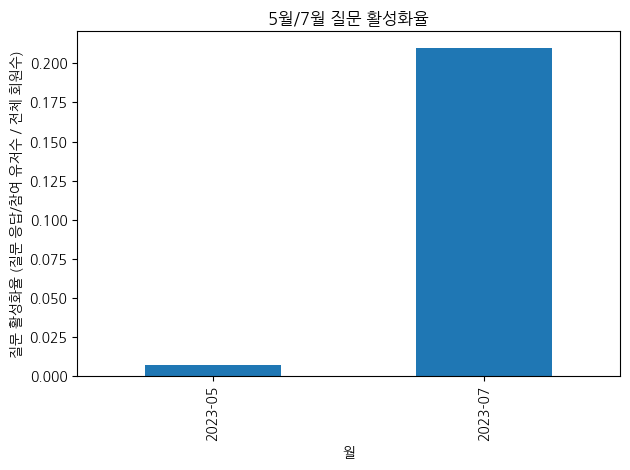

In [64]:
# vote 내 테이블 중 질문 응답/참여 기록이 있는 테이블을 사용 (예: accounts_userquestionrecord)
# 1. 질문에 응답/참여한 유저 추출
user_question_df = df_dict['accounts_userquestionrecord']
user_question_df['user_id'] = user_question_df['user_id'].astype(str)

# 2. 월별로 질문에 응답/참여한 유저 수 집계 (중복 제거)
user_question_df['answer_month'] = user_question_df['created_at'].dt.to_period('M')
monthly_active_users = user_question_df.groupby('answer_month')['user_id'].nunique()

# 3. 월별 전체 회원 수 집계 (accounts_user 기준)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_total_users = accounts_user.groupby('signup_month')['user_id'].nunique()

# 4. 월별 질문 활성화율 (질문 응답/참여 유저 수 / 전체 회원 수)
question_activation_rate = (monthly_active_users / monthly_total_users).fillna(0)

# 5. 5월, 7월만 추출
activation_rate_5_7 = question_activation_rate.loc[['2023-05', '2023-07']]
print("5월, 7월 질문 활성화율:")
print(activation_rate_5_7)

# 6. 시각화
activation_rate_5_7.plot(kind='bar', title='5월/7월 질문 활성화율')
plt.ylabel('질문 활성화율 (질문 응답/참여 유저수 / 전체 회원수)')
plt.xlabel('월')
plt.tight_layout()
plt.show()

In [65]:
monthly_active_users

answer_month
2023-04     338
2023-05    4797
2023-06    1872
2023-07     389
2023-08     170
2023-09     178
2023-10      46
2023-11      22
2023-12      26
2024-01      19
2024-02       9
2024-03      13
2024-04       4
2024-05       6
Freq: M, Name: user_id, dtype: int64

5월, 7월 투표율:
2023-05       0.000000
2023-07    1043.281166
Freq: M, dtype: float64


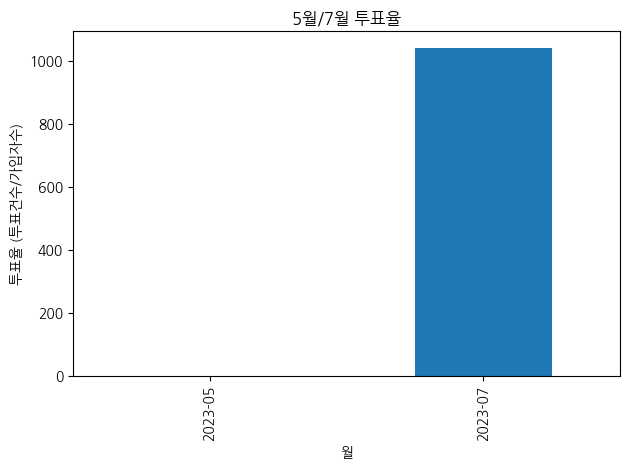

In [63]:
# 1. 투표 이벤트만 추출 (event_key가 실제 투표를 의미하는 값으로 변경)
vote_events = final_hackle_df[final_hackle_df['event_key'].isin(question_key)].copy()

# 2. 월별 투표 건수 집계
vote_events['vote_month'] = vote_events['event_datetime'].dt.to_period('M')
monthly_vote_counts = vote_events.groupby('vote_month').size()

# 3. 월별 회원가입자 수 집계 (accounts_user 기준)
accounts_user['signup_month'] = accounts_user['created_at_plus_9'].dt.to_period('M')
monthly_signup_counts = accounts_user.groupby('signup_month').size()

# 4. 월별 투표율 계산 (투표 건수 / 가입자 수)
vote_rate = (monthly_vote_counts / monthly_signup_counts).fillna(0)

# 5. 5월, 7월만 추출
vote_rate_5_7 = vote_rate.loc[['2023-05', '2023-07']]
print("5월, 7월 투표율:")
print(vote_rate_5_7)

# 6. 시각화
vote_rate.loc[['2023-05', '2023-07']].plot(kind='bar', title='5월/7월 투표율')
plt.ylabel('투표율 (투표건수/가입자수)')
plt.xlabel('월')
plt.tight_layout()
plt.show()

In [ ]:
# 두 데이터 연결(유저 ID 기준)
# accounts_user와 final_hackle_df 모두 user_id로 조인 가능
# 초기 행동 패턴 → 잔존과의 관계 분석을 위한 데이터프레임 예시
user_behavior = accounts_user[['user_id', 'created_at_plus_9', 'is_retained_30d']].merge(
    final_hackle_df, on='user_id', how='left'
)
print(user_behavior.head())

## launch_app -> view_signup 사이 발생하는 일들에 대해서
---

In [59]:
# 우선 회원가입에 무관하게(회원가입을 완료하였는가에 대해서 무관하게)
# "view_signup" 이벤트가 있는 session_id 추출
signup_session_ids = final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].unique()

# 해당 session_id의 모든 이벤트 추출
signup_sessions_all_events = final_hackle_df[final_hackle_df['session_id'].isin(signup_session_ids)]

# 각 session_id별로 "launch_app" 이벤트가 존재하는지 확인
has_launch_app = signup_sessions_all_events.groupby('session_id')['event_key'].apply(lambda x: 'launch_app' in x.values)

# "view_signup"이 있는 session_id 중 "launch_app"이 없는 session_id 개수
num_sessions_without_launch_app = (~has_launch_app).sum()
print(f'"view_signup" session 중 "launch_app"이 없는 session 수: {num_sessions_without_launch_app}')

# "view_signup" 이벤트가 발생한 시점 이전에 "launch_app"이 있었는지 확인
def launch_app_before_signup(df):
    df_sorted = df.sort_values('event_datetime')
    signup_idx = df_sorted.index[df_sorted['event_key'] == 'view_signup']
    if len(signup_idx) == 0:
        return False
    first_signup_pos = df_sorted.index.get_loc(signup_idx[0])
    # signup 이전에 launch_app이 있는지
    return (df_sorted.iloc[:first_signup_pos]['event_key'] == 'launch_app').any()

launch_app_before = signup_sessions_all_events.groupby('session_id').apply(launch_app_before_signup)
num_sessions_without_launch_app_before = (~launch_app_before).sum()
print(f'"view_signup" session 중 "view_signup" 이전에 "launch_app"이 없는 session 수: {num_sessions_without_launch_app_before}')
num_sessions_with_launch_app_before = (launch_app_before).sum()
print(f'"view_signup" session 중 "view_signup" 이전에 "launch_app"이 있는 session 수: {num_sessions_with_launch_app_before}')

"view_signup" session 중 "launch_app"이 없는 session 수: 11
"view_signup" session 중 "view_signup" 이전에 "launch_app"이 없는 session 수: 37
"view_signup" session 중 "view_signup" 이전에 "launch_app"이 있는 session 수: 6649


In [60]:
# launch_app 을 가진 session 아이디와 user_id 유니크 값

print(f"launch_app 이벤트를 가진 유니크한 session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'session_id'].nunique()}")
print(f"launch_app 이벤트를 가진 유니크한 user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'launch_app', 'user_id'].nunique()}")
print()
print(f"view_signup 이벤트를 가진 유니크한 session_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'session_id'].nunique()}")
print(f"view_signup 이벤트를 가진 유니크한 user_id : {final_hackle_df.loc[final_hackle_df['event_key'] == 'view_signup', 'user_id'].nunique()}")

launch_app 이벤트를 가진 유니크한 session_id : 242211
launch_app 이벤트를 가진 유니크한 user_id : 239538

view_signup 이벤트를 가진 유니크한 session_id : 6686
view_signup 이벤트를 가진 유니크한 user_id : 6664
